# Conversation Visibility Diagrams

One aspect of Mastodon and/or the Fediverse is federation. For my purposes here the big consequence is that each instance uses its own dataset to answer queries. This notebook studies how the answer to the list of replies can differ between instances. The goal being is to bring the answers of "How you think the Fediverse works" and "How the Fediverse works" closer together. It is not a statement about "How the Fediverse should work".

As I consider the diagrams generated by this notebook as pretty, you may also consider this as art.

In [1]:
%matplotlib inline
import hypernetx as hnx
import networkx as nx

from mastodon_recommender.reply_analyzer import ReplyAnalyzer

# This is the account name of the status we are looking the replies up for
account = "@dahukanna@mastodon.social"

# This is the URL of the status, we are looking the replies up for on its origin server
status_url = "https://mastodon.ar.al/@aral/109625642309380538"

instances = ["mastodon.green", "mas.to", "botsin.space", "hachyderm.io", "zirk.us", "wandering.shop"]


ra = ReplyAnalyzer(account, status_url, instances)


### Fetching Data

The next cell fetches the data about one of my posts from various instances specified in the list instances. The code queries various mastodon instances without using any credentials.

In [2]:
edges = ra.create_reply_graph_edges()
reply_to_instances = ra.instance_letters_by_reply()

Fetched 26 replies from mastodon.green in 1.418931007385254 seconds
Fetched 33 replies from mas.to in 1.4772047996520996 seconds
---- Status not found ----
Fetched 0 replies from botsin.space in 2.600813627243042 seconds
Fetched 28 replies from hachyderm.io in 3.2984299659729004 seconds
Fetched 29 replies from zirk.us in 1.5435092449188232 seconds
Fetched 27 replies from wandering.shop in 3.9661812782287598 seconds
Fetched 28 replies from mastodon.social in 1.7462704181671143 seconds
Fetched 33 replies from mastodon.ar.al in 2.583059787750244 seconds


## Conversation Visibility Graph

The next diagram shows the conversation graph. Statues are represented by a dot. A directed edge is represent going from reply to the status that was replied to.

The big blue dot represents the original status. The various pastell colored nodes represent the replies. The letters represent an instance according to the list displayed. For example the BE means that the reply is visible on mas.to and hachyderm.io.

A: mastodon.green
B: mas.to
C: hachyderm.io
D: zirk.us
E: wandering.shop
F: mastodon.social
G: mastodon.ar.al


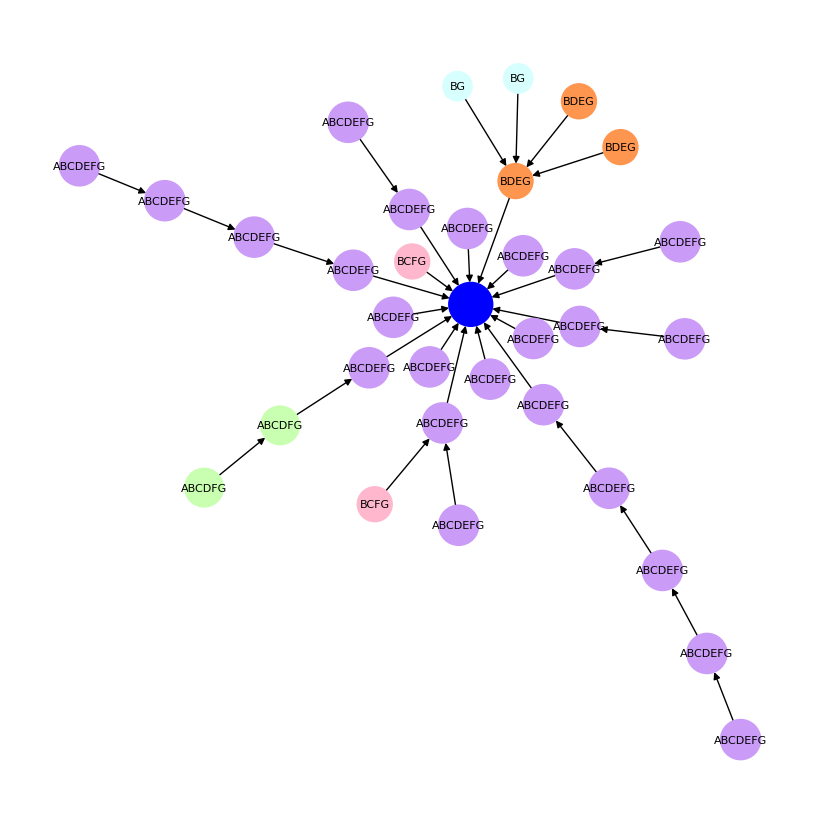

In [3]:
G, labels, node_sizes, node_colors = ra.build_conversation_visibility_graph()

for instance in ra.instances_with_replies():
    print(f"{ra.instance_to_letter(instance)}: {instance}")

node_sizes = [x ** 0.5 * 10 for x in node_sizes]

nx.draw(G, with_labels=True, labels=labels, node_size=node_sizes, node_color=node_colors, font_size=8, pos=nx.nx_pydot.pydot_layout(G))

## Visibility on Instance Diagram

The next graph illustrates the visibility depending on the instance. Black dots represent a reply. A black dot with a x2 represetns two replies.

This means that on mas.to all replies are visible.

This means that on botsin.space only one reply is visible.

This means that on wandering.shop 4 replies are visible, that are different from the one visible on botsin.space.

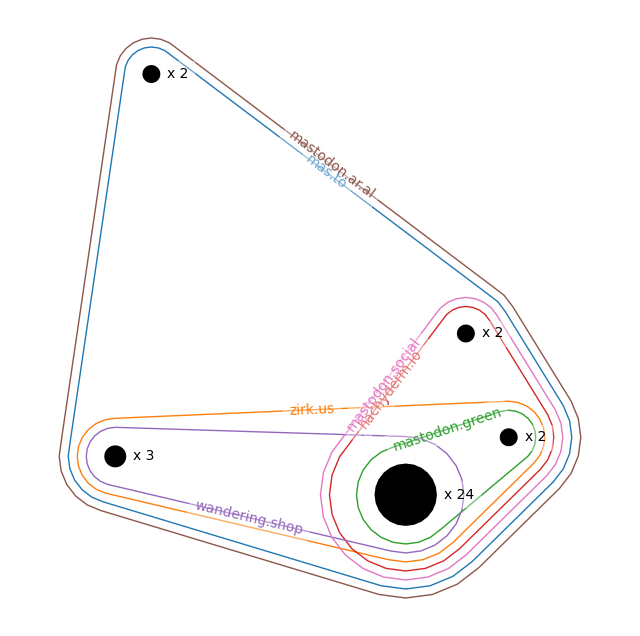

In [4]:
H = hnx.Hypergraph(ra.replies_by_instance())
hnx.drawing.draw(H.collapse_nodes(), with_node_counts=True)

## Visibility on Instance Diagram for Hashtag

This graph shows the difference between what is shown for a hashtag on different instances. The script fetches 40 statuses from each instances. Then takes the first `statuses_to_take` statues of each. Then the script checks on which servers these statuses are (in the list of all 40).

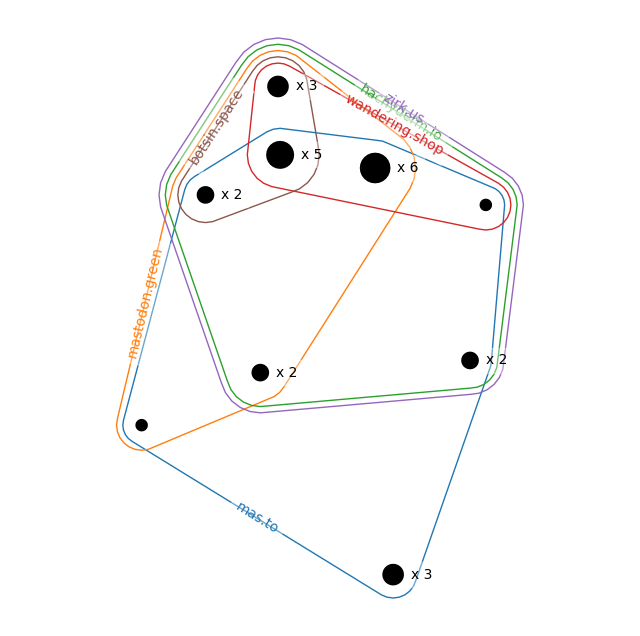

In [5]:
%matplotlib inline
import hypernetx as hnx

from mastodon_recommender.hashtag_analyzer import HashtagAnalyzer

instances = ["mastodon.green", "mas.to", "botsin.space", "hachyderm.io", "zirk.us", "wandering.shop"]


ha = HashtagAnalyzer("waterfallwednesday", instances=instances, statuses_to_take=5)
ha.fetch()


H = hnx.Hypergraph(ha.hypergraph_data())
hnx.drawing.draw(H.collapse_nodes(), with_node_counts=True)
